In [6]:
#imports
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
import numpy as np
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from metpy.units import units

#get PV at 250mb
#get pot.T at 2 p-level & 2 times 

In [11]:
ds = xr.open_dataset('wrfout_d01_0001-01-01_00_00_00')
#print(ds.keys)
#print(ds.Data_variables)
print(ds.variables)
#print(ds.SST)
#print(ds.SST.shape)


C:\Users\Anna\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Frozen({'Times': <xarray.Variable (Time: 21)>
array([b'0001-01-01_00:00:00', b'0001-01-01_06:00:00', b'0001-01-01_12:00:00',
       b'0001-01-01_18:00:00', b'0001-01-02_00:00:00', b'0001-01-02_06:00:00',
       b'0001-01-02_12:00:00', b'0001-01-02_18:00:00', b'0001-01-03_00:00:00',
       b'0001-01-03_06:00:00', b'0001-01-03_12:00:00', b'0001-01-03_18:00:00',
       b'0001-01-04_00:00:00', b'0001-01-04_06:00:00', b'0001-01-04_12:00:00',
       b'0001-01-04_18:00:00', b'0001-01-05_00:00:00', b'0001-01-05_06:00:00',
       b'0001-01-05_12:00:00', b'0001-01-05_18:00:00', b'0001-01-06_00:00:00'],
      dtype='|S19'), 'XLAT': <xarray.Variable (Time: 21, south_north: 80, west_east: 40)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       ...,

       [[0., 0., ..

In [8]:
#perturbation pot temp theta-t0---'THM': <xarray.Variable (Time: 21, bottom_top: 64, south_north: 80, west_east: 40)>
print(ds.THM.shape)
#base state TEMP---'P00': <xarray.Variable (Time: 21)>
print(ds.P00.shape)

print(ds.THM)

(21, 64, 80, 40)
(21,)
<xarray.DataArray 'THM' (Time: 21, bottom_top: 64, south_north: 80, west_east: 40)>
[4300800 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XTIME    (Time) object ...
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  either 1) pert moist pot temp=(1+Rv/Rd Qv)*(theta)-T0, or 2...
    units:        K
    stagger:      


In [9]:
#set lat lon

lat=ds.THM.south_north.values
#lat
lon=ds.THM.west_east.values
#lon
plevel=ds.THM.bottom_top.values
#plevel
lat[0]

0

In [35]:
#set potT

#at given plevel, inital time
theta=ds.THM.values[0,12,:,:]
#theta
theta_loop=ds.THM.values[0,:,:,:]

#perturbation pressiure: 'PB': <xarray.Variable (Time: 21, bottom_top: 64, south_north: 80, west_east: 40)>
#Uwind  X, 'V': <xarray.Variable (Time: 21, bottom_top: 64, south_north_stag: 81, west_east: 40)>
#vWind Y, 'W': <xarray.Variable (Time: 21, bottom_top_stag: 65, south_north: 80, west_east: 40)>

pressure=ds.PB.values[0,12,:,:]
u=ds.V.values[0,12,:,:]
v=ds.W.values[0,12,:,:]
print(ds.bottom_top)
print(ds.THM.bottom_top)

<xarray.DataArray 'bottom_top' (bottom_top: 64)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=int64)
Dimensions without coordinates: bottom_top
<xarray.DataArray 'bottom_top' (bottom_top: 64)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=int64)
Dimensions without coordinates: bottom_top


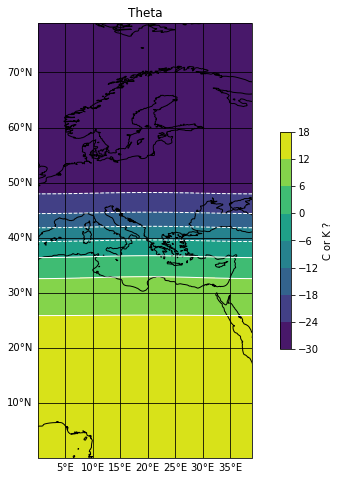

In [41]:
mapcrs = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)

#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
cs = ax.contourf(lon, lat, theta)
#contnour lines
ax.contour(lon, lat, theta, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'C or K ?')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False
plt.title('Theta')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()

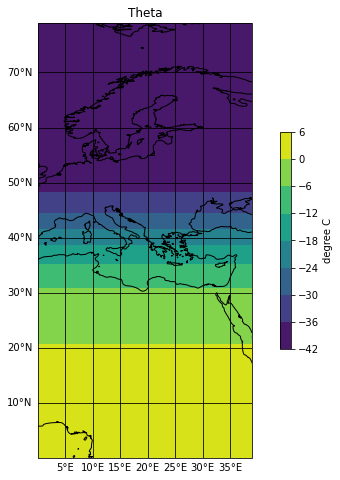

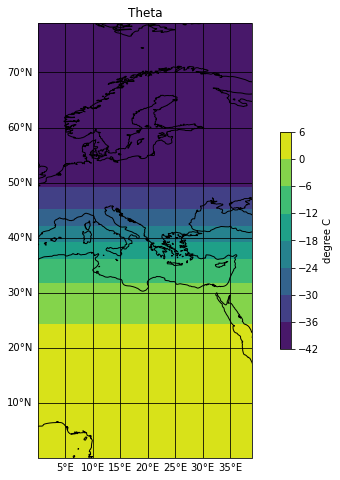

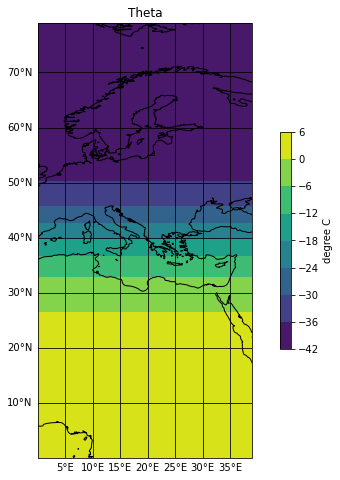

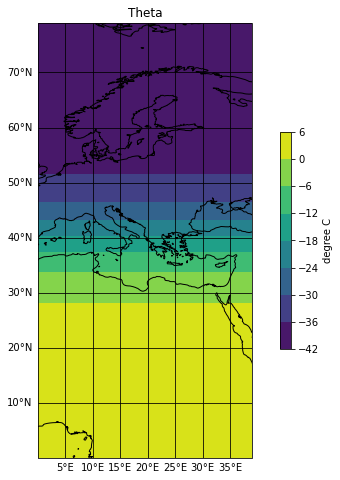

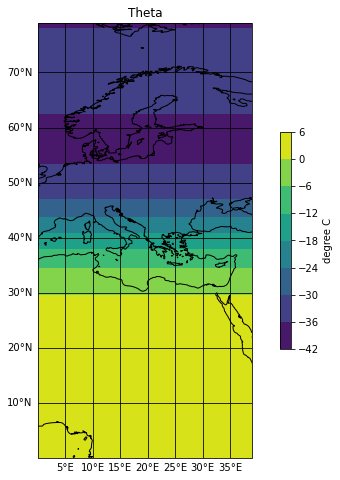

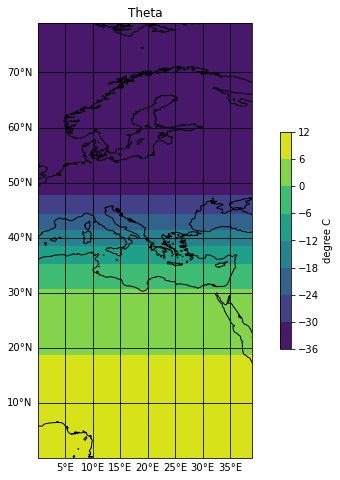

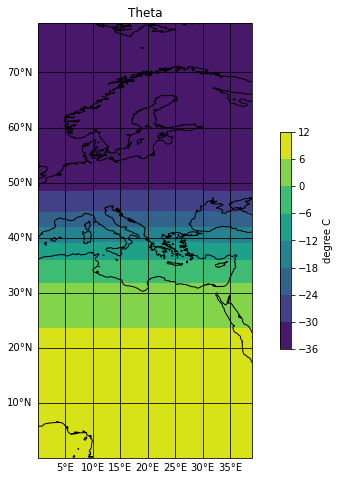

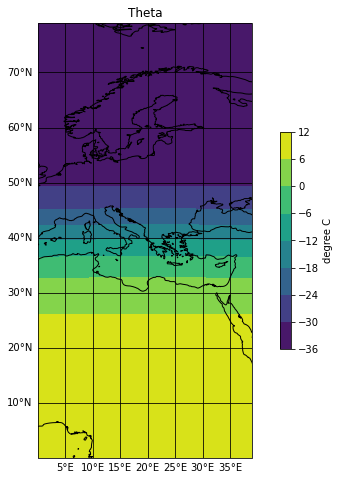

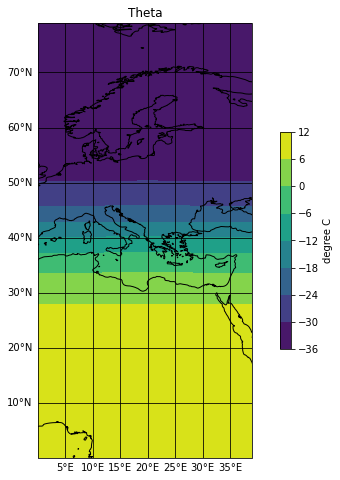

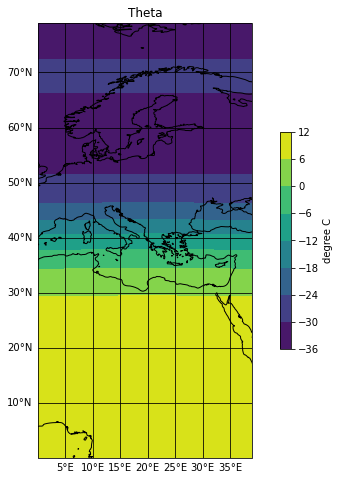

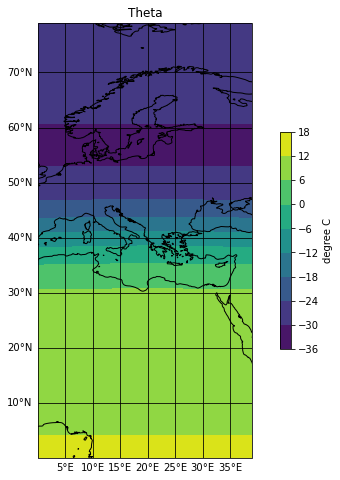

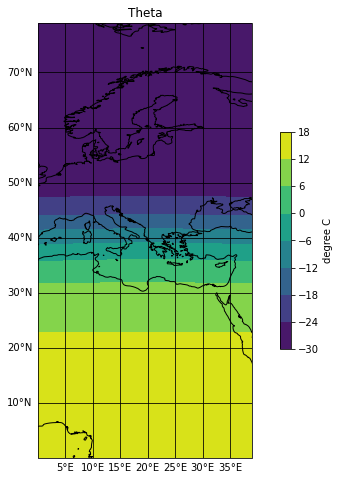

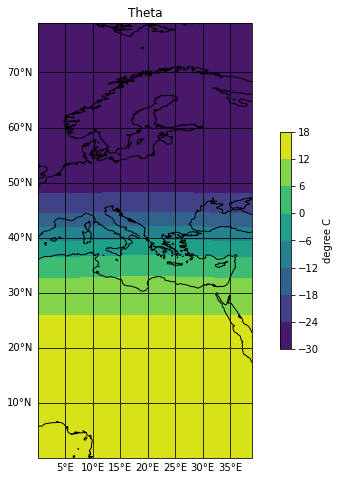

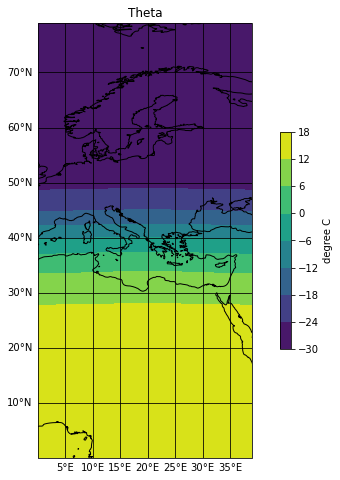

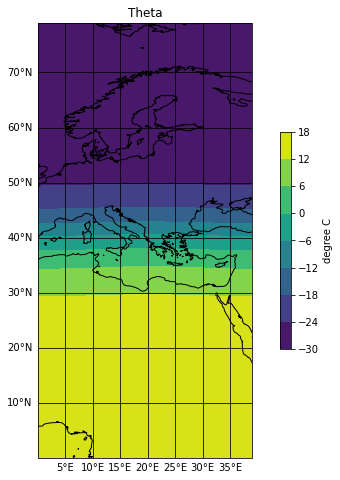

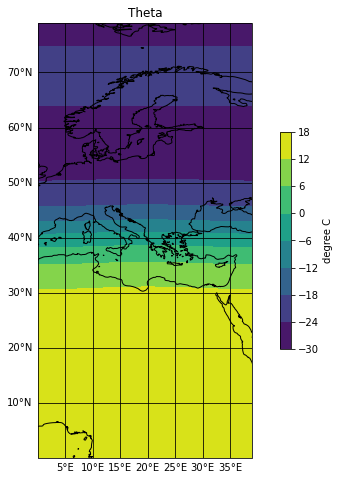

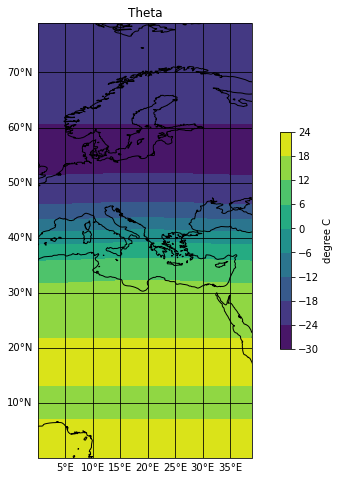

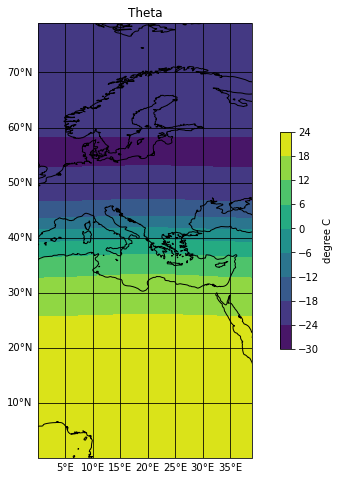

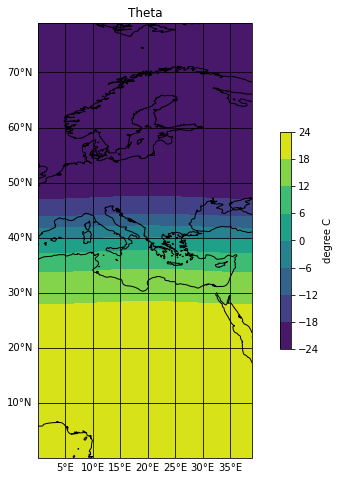

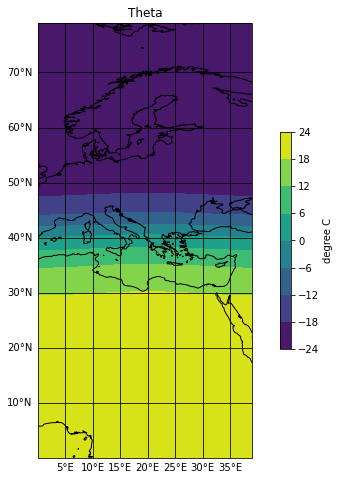

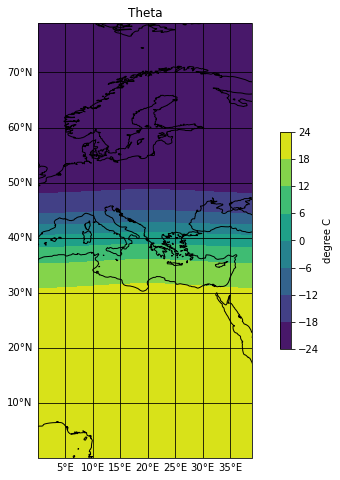

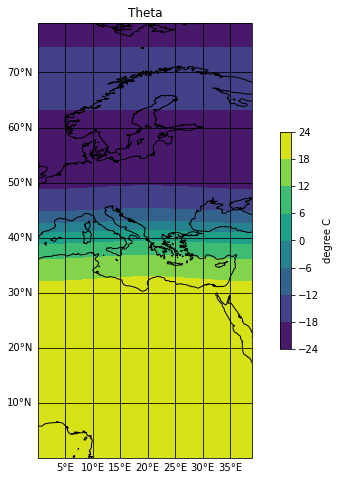

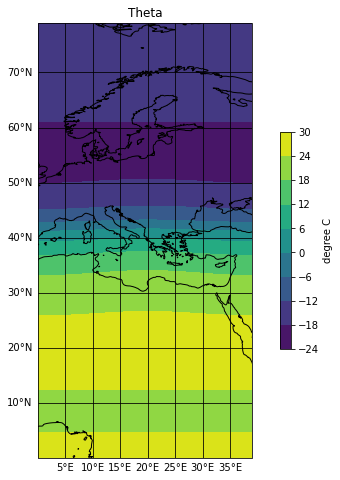

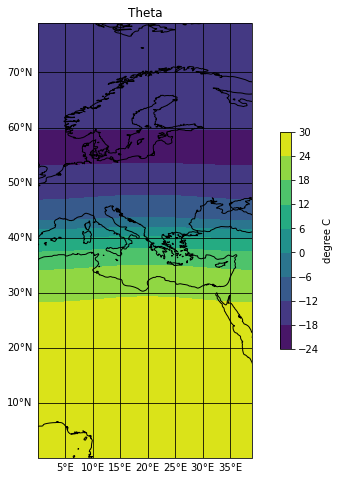

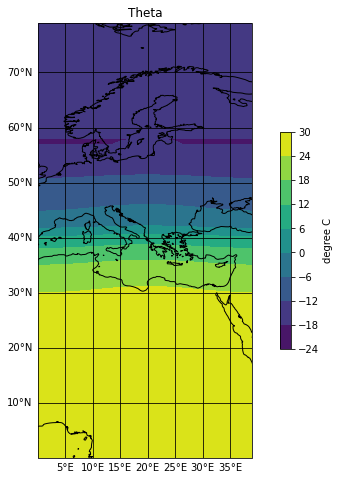

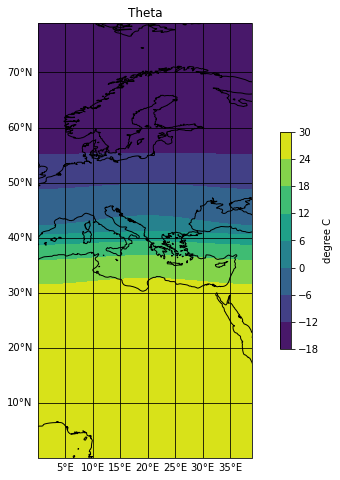

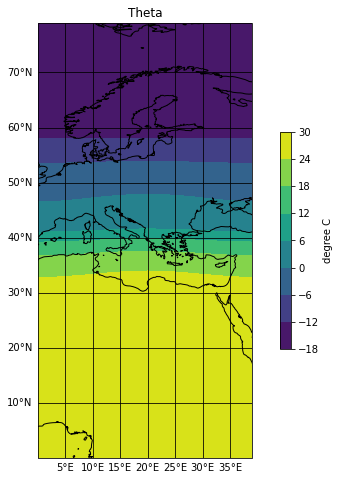

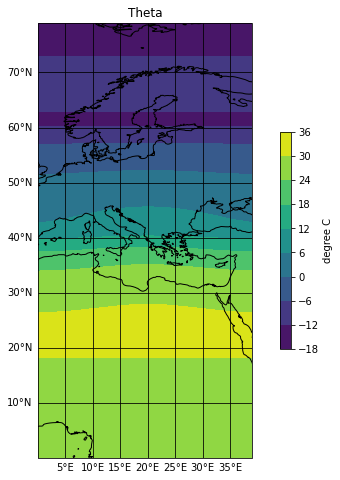

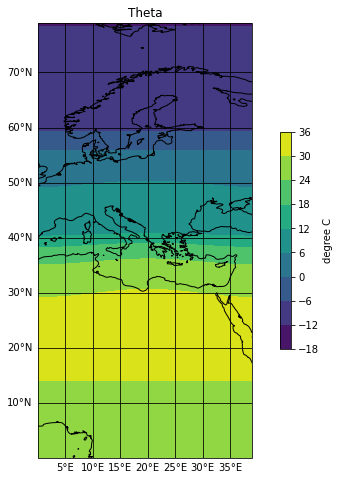

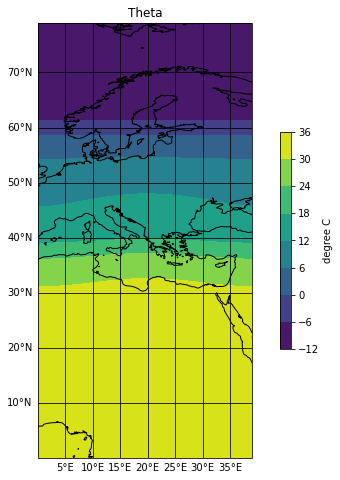

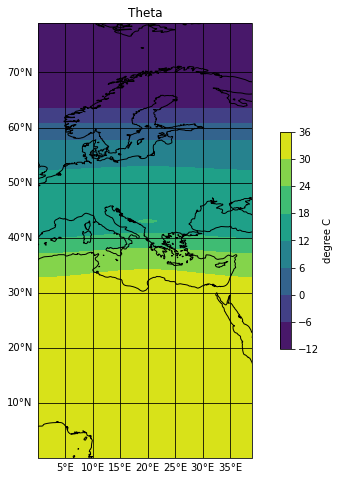

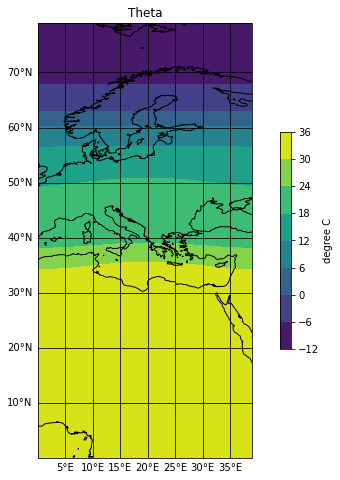

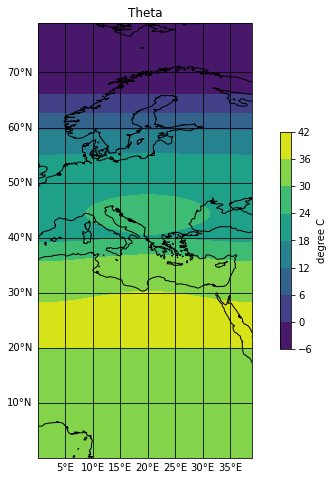

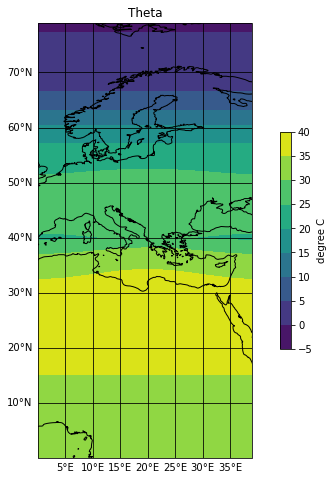

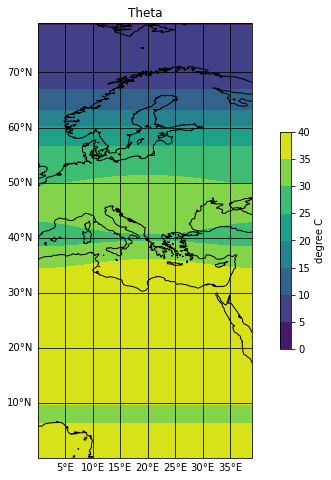

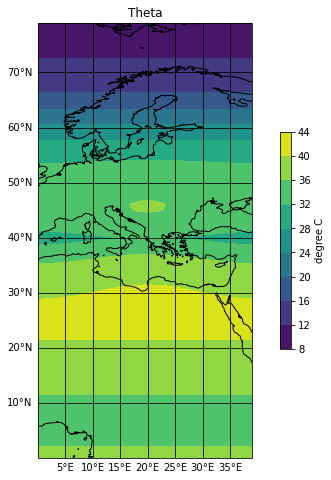

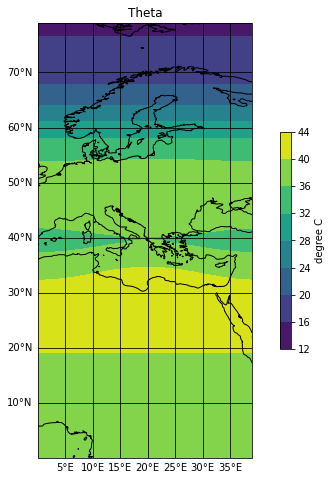

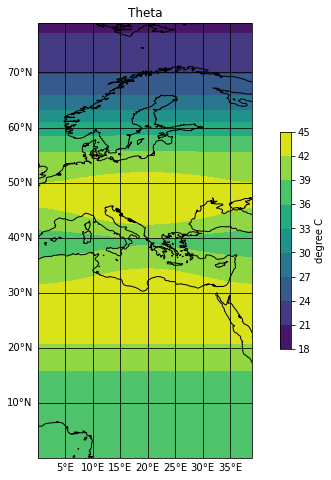

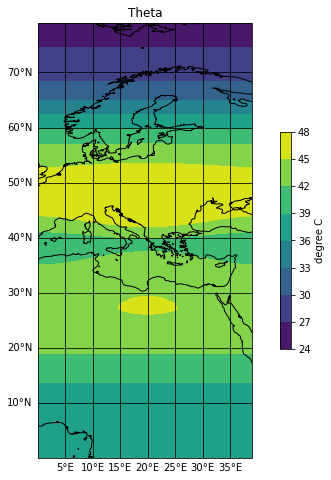

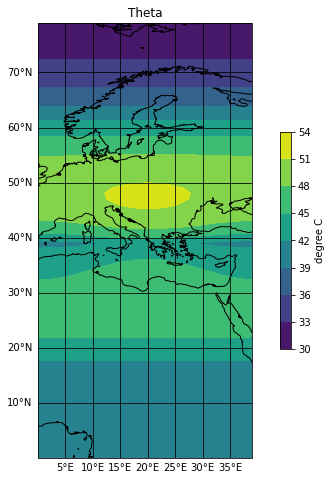

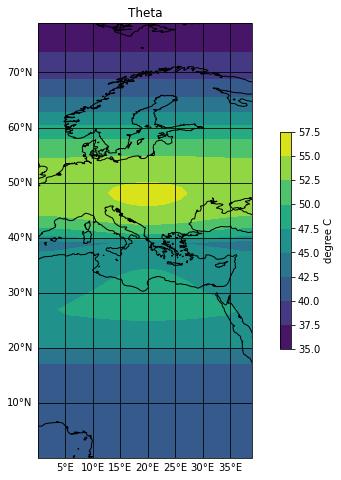

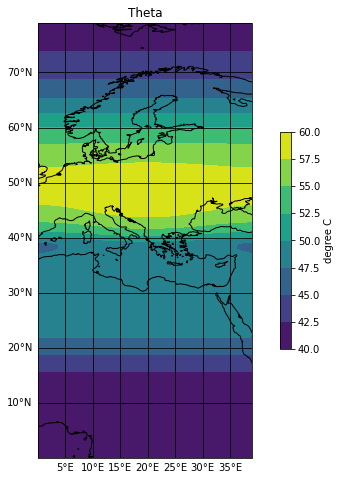

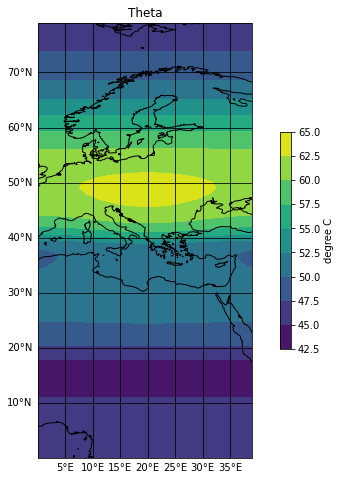

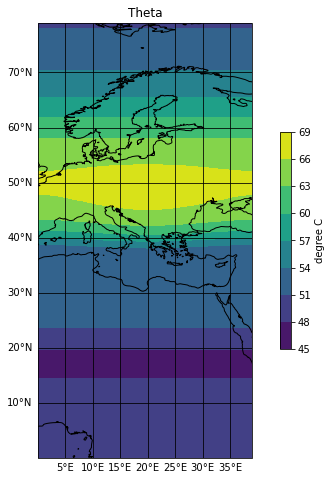

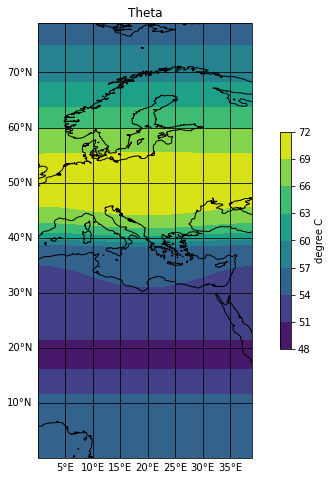

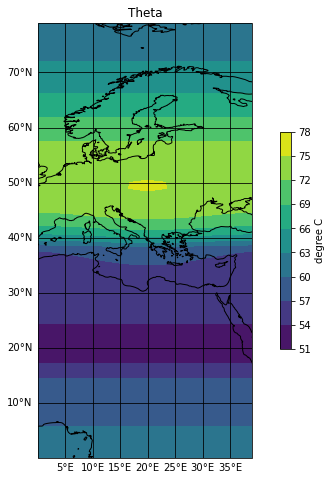

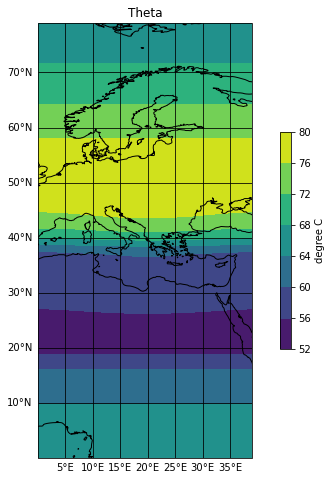

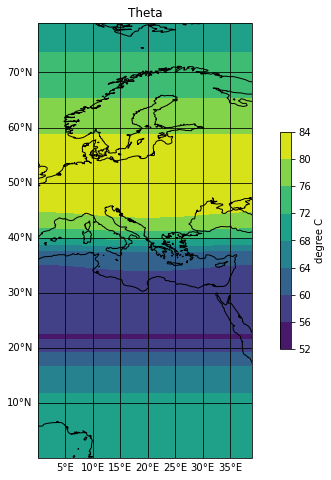

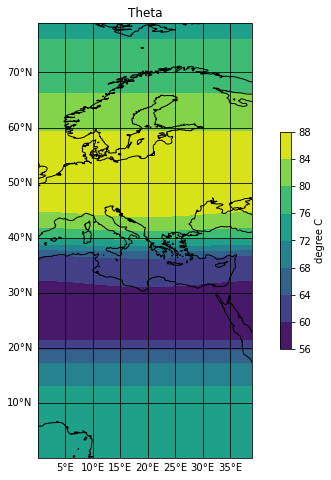

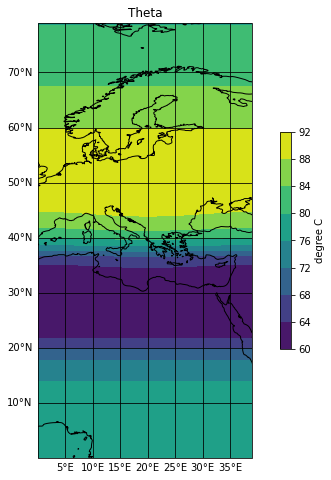

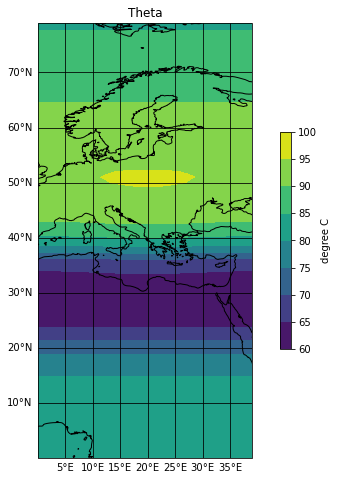

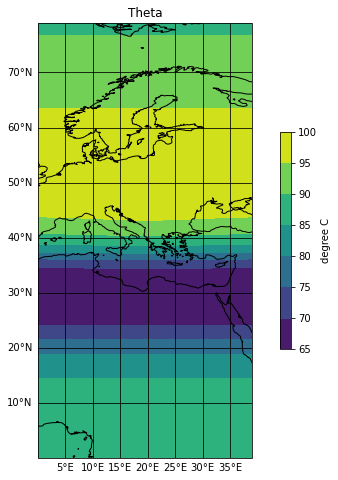

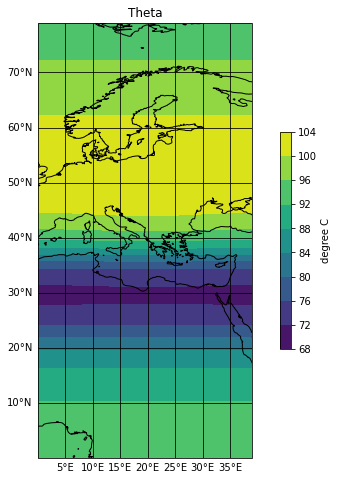

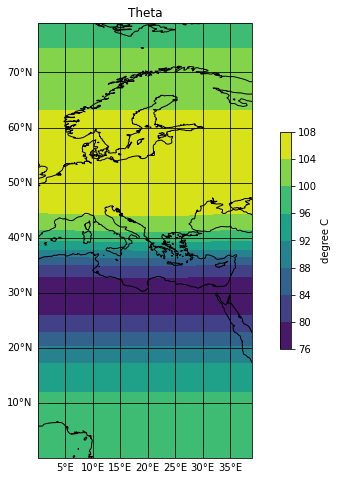

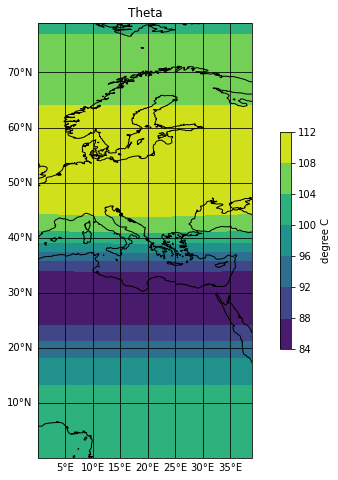

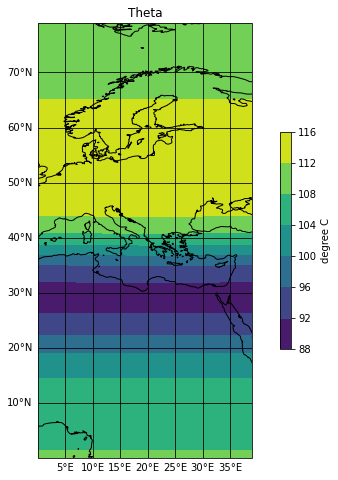

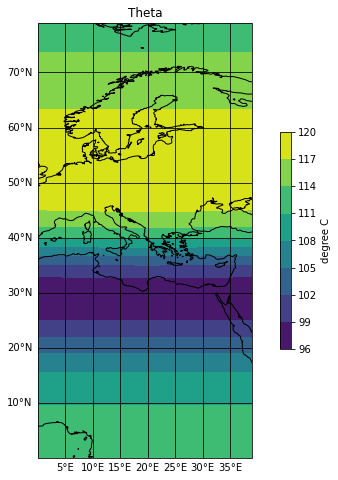

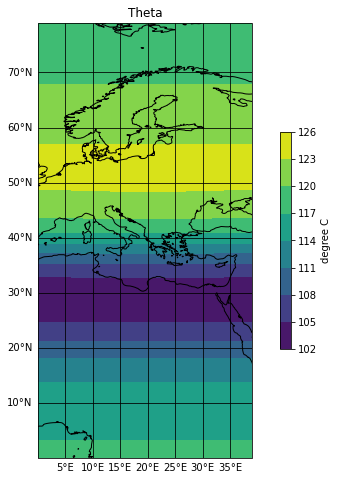

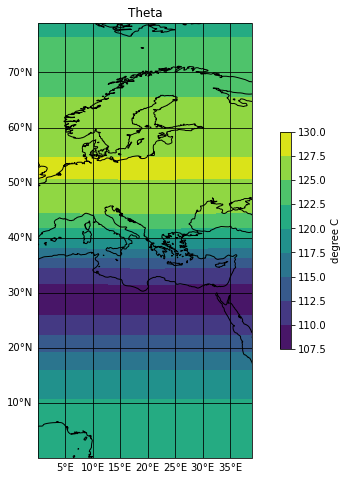

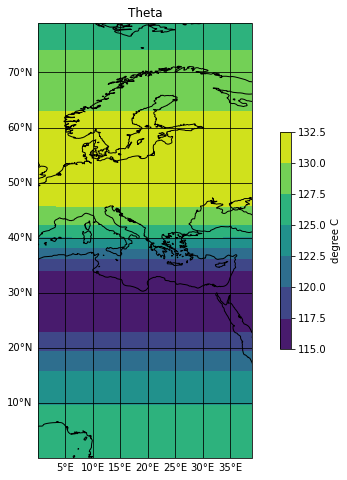

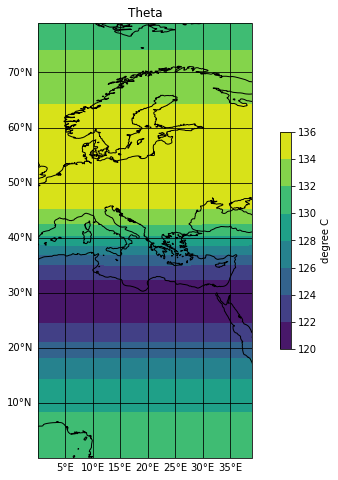

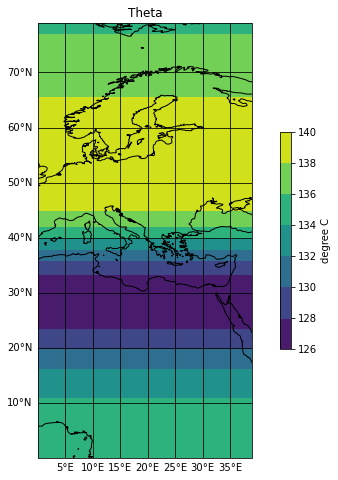

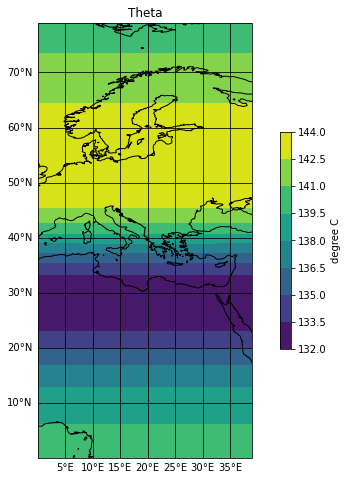

In [17]:
#loop to plot 
for i in range(0,63):
    mapcrs = ccrs.PlateCarree()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection=mapcrs)
    ax.coastlines()
    #filled contours (lon, lat, thing plotted)
    #use theta_loop for loop
    cs = ax.contourf(lon, lat, theta_loop[i])
    #contnour lines
    ax.contour(lon, lat, theta, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
    #np.arange(start point, end point, interval), will not plot 4 because zero place included
    #ax.contour(era5_lon, era5_lat, press_avg.pv[0,:,:], np.arange(1e-6, 4e-6, 0.5e-6), colors = 'white', linewidths = 0.5, transform=ccrs.PlateCarree())
    
    #ax=plt.gca()
    #color bars
    PCM=ax.get_children()[2]
    plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'degree K')
    #lat lon grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
    #don't want labels
    gl.top_labels = False
    gl.ylabels_right = False
    plt.title('Theta')
    
    #To save figure as png
    #plt.savefig('Theta.png', bbox_inches='tight', dpi=150)
    plt.show()

In [29]:
#perturbation pressiure: 'PB': <xarray.Variable (Time: 21, bottom_top: 64, south_north: 80, west_east: 40)>

#Uwind  X, 'V': <xarray.Variable (Time: 21, bottom_top: 64, south_north_stag: 81, west_east: 40)>
#vWind Y, 'W': <xarray.Variable (Time: 21, bottom_top_stag: 65, south_north: 80, west_east: 40)>

#metpy.calc.potential_vorticity_baroclinic(potential_temperature, pressure, u, v, 
#                                         dx=None, dy=None, latitude=None, x_dim=- 1, y_dim=- 2, vertical_dim=- 3)¶

test=mpcalc.potential_vorticity_baroclinic(theta[0]*units.degC, pressure[0]*units., u[0]*units.('m/s'), v[0]*units.('m/s'), dx=0.2, dy=0.2, latitude=0)
test

ValueError: This function changed in 1.0--double check that the function is being called properly.
`potential_vorticity_baroclinic` given arguments with incorrect units: `potential_temperature` requires "[temperature]" but given "none", `pressure` requires "[pressure]" but given "none", `u` requires "[speed]" but given "none", `v` requires "[speed]" but given "none", `dx` requires "[length]" but given "none", `dy` requires "[length]" but given "none"
Any variable `x` can be assigned a unit as follows:
    from metpy.units import units
    x = units.Quantity(x, "m/s")